In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

#Loadfile
file_path = "Housing data.csv"
df = pd.read_csv(file_path)

#Features, Target
X = df[['Median_Home_Value', 'Median_Gross_Rent']]
y = df['Per_Capita_Income']

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

#Fit
model = LinearRegression()
model.fit(X_train, y_train)

#Output
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = dict(zip(X.columns, model.coef_))

mse, r2, coefficients

(267762544.79211277,
 0.2350474043341324,
 {'Median_Home_Value': np.float64(0.04619156474189825),
  'Median_Gross_Rent': np.float64(7.063812843587744)})

Justification: The code block above runs linear regression to preidct median income using median rent and home value. It may be a useful tool for users to gauge what kind of income they would need or expect to move to certain zipcodes in UT or CO. They can also use this data to compare to moving to other states regarding income in comparison to the housing cost.

Explanation: R^2 at 0.235, weak explanation. This model isn't particularly strong, but can still be useful for reference regardless.

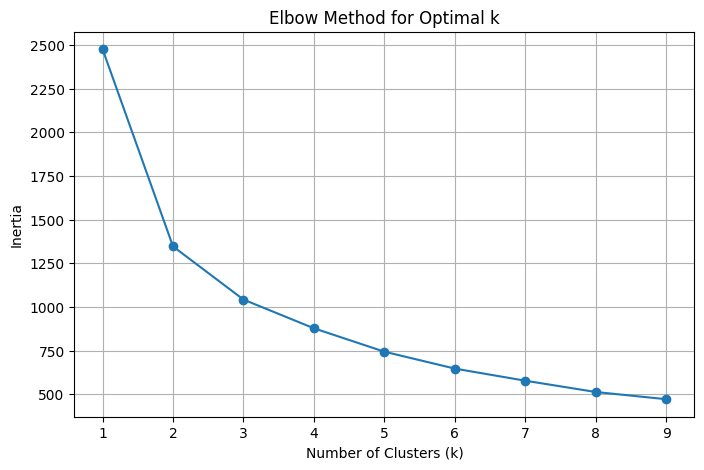

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Standardize the features for clustering
features = df[['Per_Capita_Income', 'Median_Home_Value', 'Median_Gross_Rent']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#Parameaters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

#Plot the elbow curve again
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
#Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

#Calculate the mean values for each cluster
cluster_summary = df.groupby('Cluster')[['Per_Capita_Income', 'Median_Home_Value', 'Median_Gross_Rent']].mean()

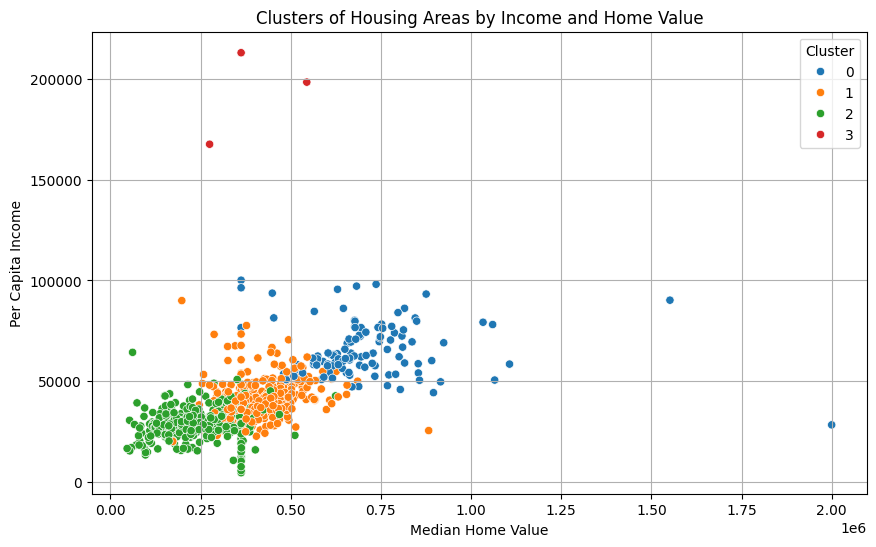

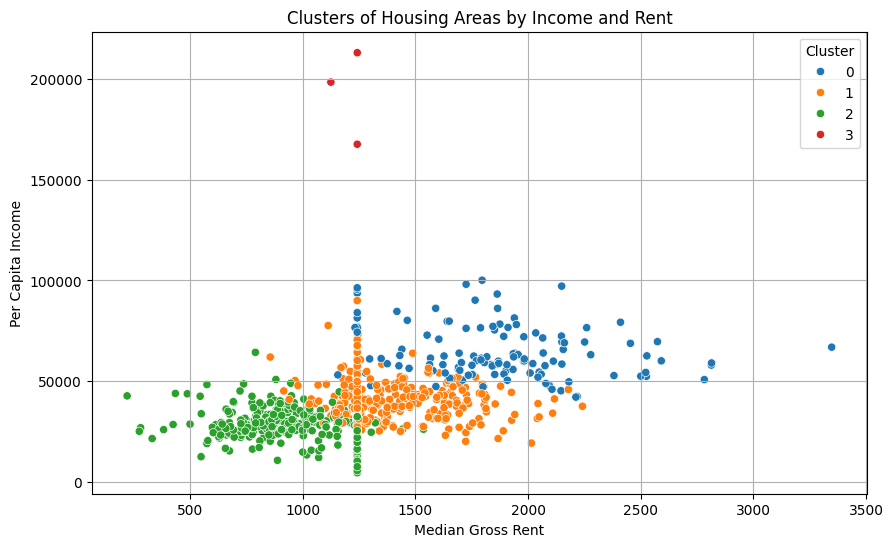

In [ ]:
import seaborn as sns

#Plot the clusters with income vs home value
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Median_Home_Value',
    y='Per_Capita_Income',
    hue='Cluster',
    palette='tab10'
)
plt.title('Clusters of Housing Areas by Income and Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Per Capita Income')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Plot the clusters with income vs rent
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Median_Gross_Rent',
    y='Per_Capita_Income',
    hue='Cluster',
    palette='tab10'
)
plt.title('Clusters of Housing Areas by Income and Rent')
plt.xlabel('Median Gross Rent')
plt.ylabel('Per Capita Income')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

#Calculate the silhouette score for k=4
sil_score = silhouette_score(scaled_features, df['Cluster'])

sil_score

np.float64(0.33731484884602625)

Justification: by using k-means clustering to find out what some of the clusters regarding housing are, Users then may find similar zip codes regarding housing in CO and UT in relation to one another in terms of economics. They may also input certain income, rent, data from other states' zip codes and find similar zip codes in UT and CO.

Explanation: Moderate cluster quality, it can be useful when determining which zipcodes to move to as one can simply search zipcode and find which cluster it belongs to in the model